In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data=pd.read_csv("C:/Users/srvik/Desktop/Train.csv")

In [4]:
print (train_data)

                 Id  OrgId  IncidentId  AlertId    Timestamp  DetectorId  \
0      1.803890e+11      0         612   123247  45447.48281           7   
1      4.552670e+11     88         326   210035  45457.35515          58   
2      1.056560e+12    809       58352   712507  45456.43258         423   
3      1.279900e+12     92       32992   774301  45453.92333           2   
4      2.147480e+11    148        4359   188041  45458.27647           9   
...             ...    ...         ...      ...          ...         ...   
99995  5.497560e+11    530       13621     9184  45450.08563         577   
99996  3.435970e+11    142      439844  1505560  45446.66118          33   
99997  1.185410e+12    303         394  1308734  45458.62675           0   
99998  1.546190e+11   1168        6386    23247  45447.29704           1   
99999  5.841160e+11     18      234944  1081769  45459.12645           9   

       AlertTitle           Category  MitreTechniques   IncidentGrade  ...  \
0        

In [5]:
print(train_data.isnull().sum())

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
MitreTechniques       57496
IncidentGrade           525
ActionGrouped         99412
ActionGranular        99412
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
EmailClusterId        98984
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
ThreatFamily          99200
FileName                  0
FolderPath                0
ResourceIdName            0
ResourceType        

In [6]:
train_df=train_data.drop(['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict'],
  axis=1)

In [7]:
print(train_df.isnull().sum())

Id                      0
OrgId                   0
IncidentId              0
AlertId                 0
Timestamp               0
DetectorId              0
AlertTitle              0
Category                0
IncidentGrade         525
EntityType              0
EvidenceRole            0
DeviceId                0
Sha256                  0
IpAddress               0
Url                     0
AccountSid              0
AccountUpn              0
AccountObjectId         0
AccountName             0
DeviceName              0
NetworkMessageId        0
RegistryKey             0
RegistryValueName       0
RegistryValueData       0
ApplicationId           0
ApplicationName         0
OAuthApplicationId      0
FileName                0
FolderPath              0
ResourceIdName          0
OSFamily                0
OSVersion               0
CountryCode             0
State                   0
City                    0
dtype: int64


In [8]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  100000 non-null  float64
 1   OrgId               100000 non-null  int64  
 2   IncidentId          100000 non-null  int64  
 3   AlertId             100000 non-null  int64  
 4   Timestamp           100000 non-null  float64
 5   DetectorId          100000 non-null  int64  
 6   AlertTitle          100000 non-null  int64  
 7   Category            100000 non-null  object 
 8   IncidentGrade       99475 non-null   object 
 9   EntityType          100000 non-null  object 
 10  EvidenceRole        100000 non-null  object 
 11  DeviceId            100000 non-null  int64  
 12  Sha256              100000 non-null  int64  
 13  IpAddress           100000 non-null  int64  
 14  Url                 100000 non-null  int64  
 15  AccountSid          100000 non-null

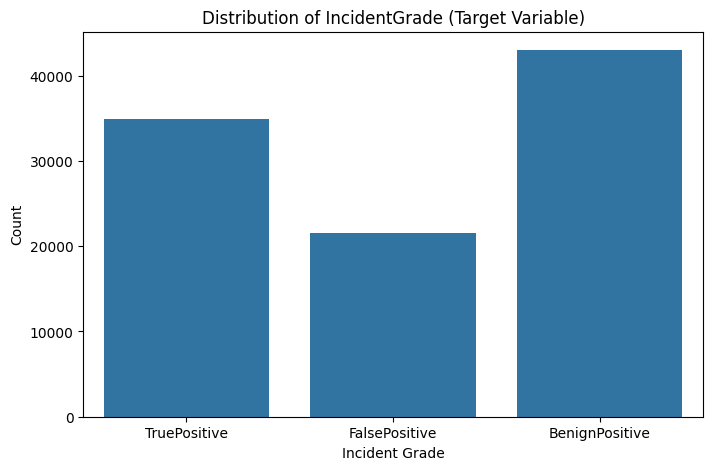

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='IncidentGrade')
plt.title("Distribution of IncidentGrade (Target Variable)")
plt.xlabel("Incident Grade")
plt.ylabel("Count")
plt.show()


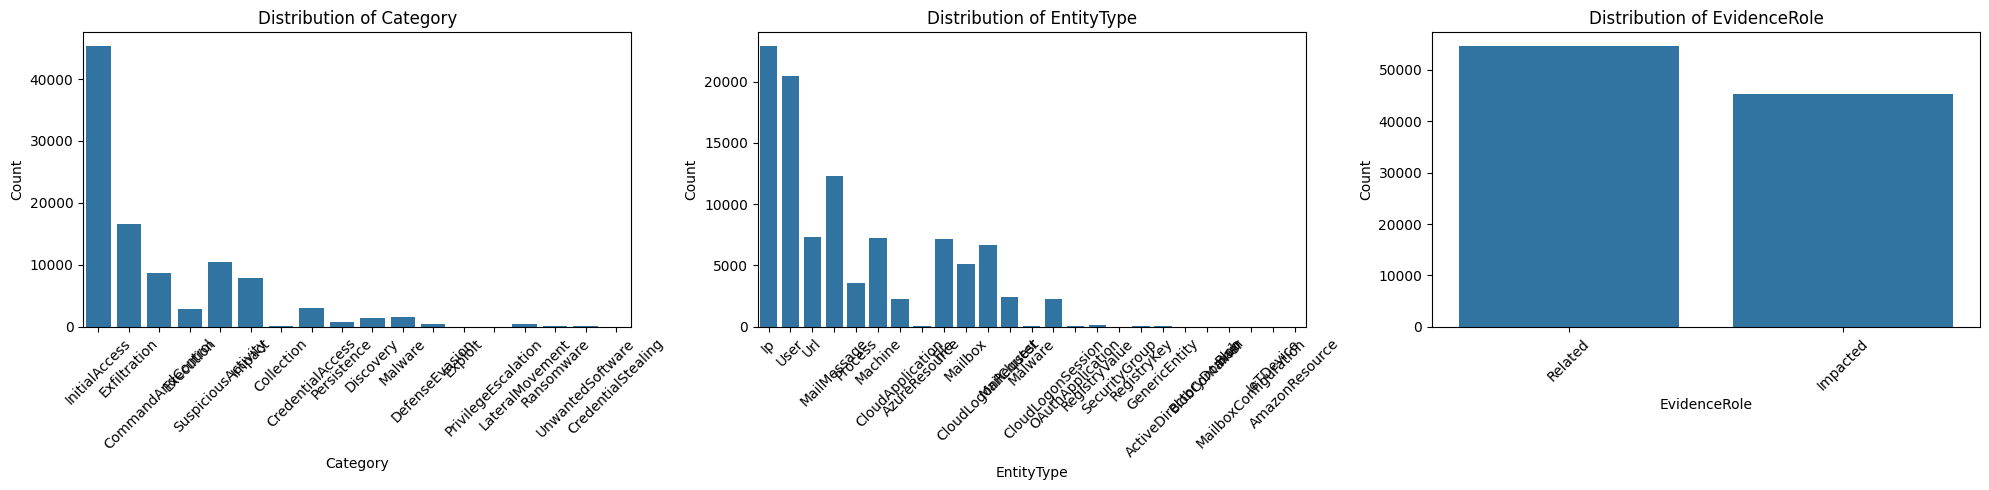

In [11]:
categorical_features = ['Category', 'EntityType', 'EvidenceRole']

# Plot distributions
fig, axs = plt.subplots(1, len(categorical_features), figsize=(20, 5))
for i, feature in enumerate(categorical_features):
    sns.countplot(data=train_df, x=feature, ax=axs[i])
    axs[i].set_title(f"Distribution of {feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Count")
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


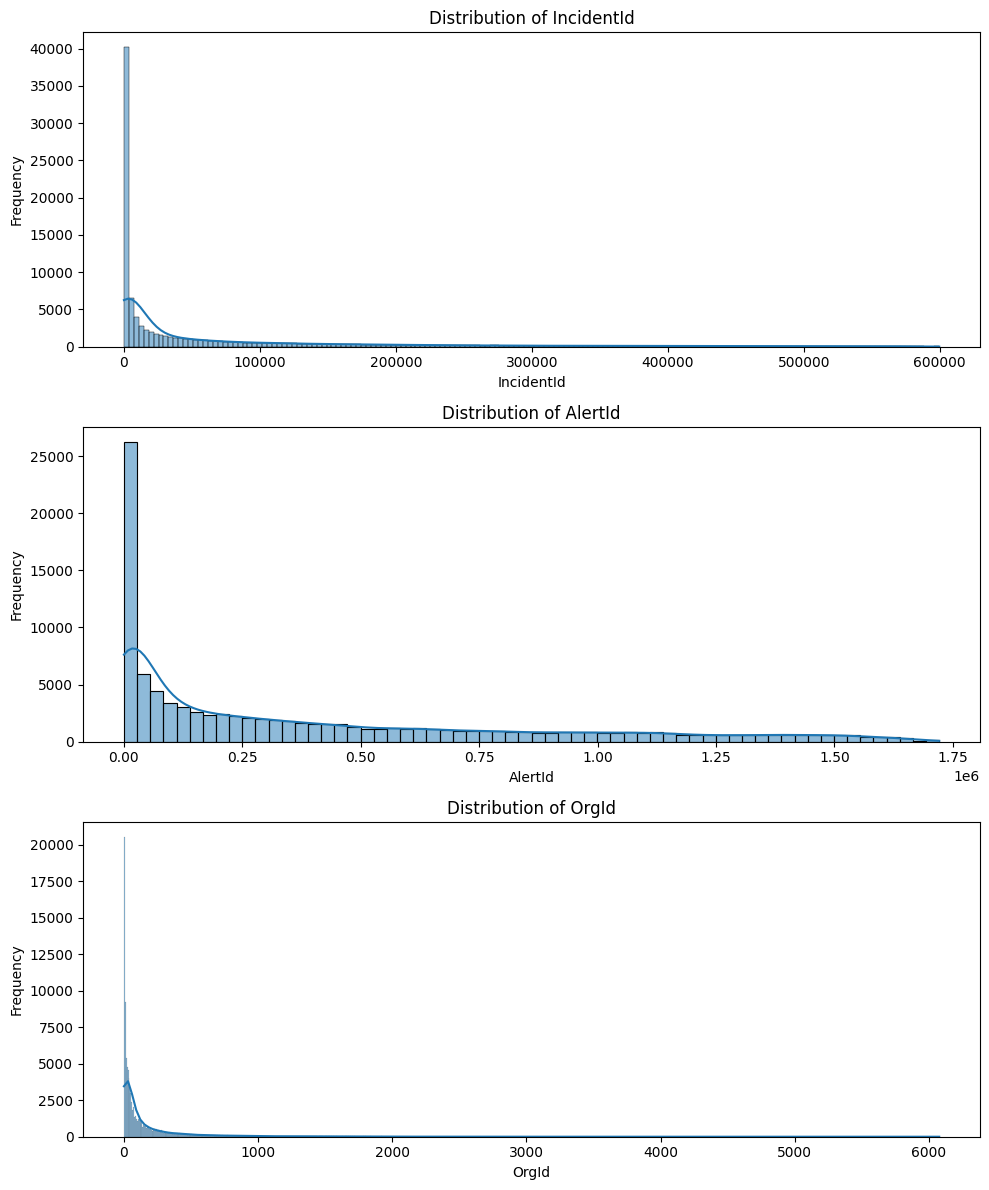

In [10]:
numerical_features = ['IncidentId', 'AlertId', 'OrgId']  # Update with relevant numerical features

# Plot histograms
fig, axs = plt.subplots(len(numerical_features), 1, figsize=(10, len(numerical_features) * 4))
for i, feature in enumerate(numerical_features):
    sns.histplot(data=train_df, x=feature, kde=True, ax=axs[i])
    axs[i].set_title(f"Distribution of {feature}")
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [12]:
# Display summary statistics
print(train_df.describe())


                 Id          OrgId     IncidentId       AlertId  \
count  1.000000e+05  100000.000000  100000.000000  1.000000e+05   
mean   8.451308e+11     181.687060   71116.738560  4.056623e+05   
std    4.972310e+11     391.166851  121492.215217  4.581139e+05   
min    5.000000e+00       0.000000       0.000000  0.000000e+00   
25%    4.209070e+11      10.000000     503.000000  2.367150e+04   
50%    8.418140e+11      44.000000   10249.500000  2.170975e+05   
75%    1.279900e+12     170.000000   84911.250000  6.703705e+05   
max    1.709400e+12    6077.000000  599699.000000  1.721368e+06   

           Timestamp     DetectorId     AlertTitle       DeviceId  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean    45450.745459     106.903630    2958.699540   95722.599650   
std         5.751551     420.005878   11470.995379   16176.619949   
min     45276.129390       0.000000       0.000000       0.000000   
25%     45447.911060       2.000000       2.000000 

In [13]:
print(train_df['IncidentGrade'].value_counts())


IncidentGrade
BenignPositive    43024
TruePositive      34887
FalsePositive     21564
Name: count, dtype: int64


In [14]:
print(train_data.isnull().sum())

Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
MitreTechniques       57496
IncidentGrade           525
ActionGrouped         99412
ActionGranular        99412
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
EmailClusterId        98984
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
ThreatFamily          99200
FileName                  0
FolderPath                0
ResourceIdName            0
ResourceType        

In [15]:
train_df=train_df.drop('Timestamp',axis=1)

In [16]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  100000 non-null  float64
 1   OrgId               100000 non-null  int64  
 2   IncidentId          100000 non-null  int64  
 3   AlertId             100000 non-null  int64  
 4   DetectorId          100000 non-null  int64  
 5   AlertTitle          100000 non-null  int64  
 6   Category            100000 non-null  object 
 7   IncidentGrade       99475 non-null   object 
 8   EntityType          100000 non-null  object 
 9   EvidenceRole        100000 non-null  object 
 10  DeviceId            100000 non-null  int64  
 11  Sha256              100000 non-null  int64  
 12  IpAddress           100000 non-null  int64  
 13  Url                 100000 non-null  int64  
 14  AccountSid          100000 non-null  int64  
 15  AccountUpn          100000 non-null

In [17]:
train_df['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    43024
TruePositive      34887
FalsePositive     21564
Name: count, dtype: int64

In [18]:
print(train_df['EvidenceRole'].value_counts())
print(train_df['EntityType'].value_counts())
print(train_df['Category'].value_counts())


EvidenceRole
Related     54590
Impacted    45410
Name: count, dtype: int64
EntityType
Ip                       22868
User                     20487
MailMessage              12300
Url                       7295
Machine                   7222
File                      7128
CloudLogonRequest         6658
Mailbox                   5095
Process                   3576
MailCluster               2419
CloudApplication          2295
CloudLogonSession         2229
RegistryValue              115
AzureResource              106
RegistryKey                 89
GenericEntity               36
Malware                     30
OAuthApplication            25
SecurityGroup               16
Blob                         4
BlobContainer                2
MailboxConfiguration         2
ActiveDirectoryDomain        1
IoTDevice                    1
AmazonResource               1
Name: count, dtype: int64
Category
InitialAccess          45273
Exfiltration           16556
SuspiciousActivity     10528
CommandAndControl

In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
numeric_data = train_df.select_dtypes(include=['float64', 'int64'])
categorical_data = train_df.select_dtypes(exclude=['float64', 'int64'])
imputer = KNNImputer(n_neighbors=5)
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Encoding categorical features
label_encoders = {}
for col in categorical_data.columns:
    le = LabelEncoder()
    categorical_data[col] = le.fit_transform(categorical_data[col].astype(str))
    label_encoders[col] = le

In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(train_df)  # This will fill missing values
# Separate rows with known incidentgrade
known_grade_df = train_df[train_df['IncidentGrade'].notnull()]
unknown_grade_df = train_df[train_df['IncidentGrade'].isnull()]

# Define features and target for the model
X_known = known_grade_df.drop(columns=['IncidentGrade'])
y_known = known_grade_df['IncidentGrade']

# Train a model to predict the incidentgrade for missing entries
from sklearn.ensemble import RandomForestClassifier

grade_model = RandomForestClassifier()
grade_model.fit(X_known, y_known)

# Predict incidentgrade for missing values
X_unknown = unknown_grade_df.drop(columns=['IncidentGrade'])
unknown_grade_df['IncidentGrade'] = grade_model.predict(X_unknown)

# Combine the two dataframes back together
df_filled = pd.concat([known_grade_df, unknown_grade_df])


ValueError: could not convert string to float: 'InitialAccess'

In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Step 1: Load and Inspect Data
file_path = 'data/GUIDE_Train.csv'  # Update the path to your local file
data = pd.read_csv(file_path)

# Basic info and distribution of target variable
print(data.info())
print(data['IncidentGrade'].value_counts())

# Step 2: Exploratory Data Analysis (EDA)
# Visualizing target class imbalance
sns.countplot(x='IncidentGrade', data=data)
plt.title("IncidentGrade Distribution")
plt.show()

# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Step 3: Data Preprocessing
# Fill missing values with KNN Imputer for numerical columns only
from sklearn.impute import KNNImputer
numeric_data = data.select_dtypes(include=['float64', 'int64'])
categorical_data = data.select_dtypes(exclude=['float64', 'int64'])

imputer = KNNImputer(n_neighbors=5)
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Encoding categorical features
label_encoders = {}
for col in categorical_data.columns:
    le = LabelEncoder()
    categorical_data[col] = le.fit_transform(categorical_data[col].astype(str))
    label_encoders[col] = le

# Concatenate numerical and categorical data
processed_data = pd.concat([numeric_data_imputed, categorical_data], axis=1)

# Step 4: Train-Validation Split
X = processed_data.drop(columns=['IncidentGrade'])  # Replace with target variable column
y = processed_data['IncidentGrade']

# Handle class imbalance with stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Step 5: Baseline Model - Logistic Regression
from sklearn.linear_model import LogisticRegression
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

# Evaluate baseline
baseline_predictions = baseline_model.predict(X_val)
print("Baseline Classification Report:\n", classification_report(y_val, baseline_predictions))

# Step 6: Model Selection - Random Forest with SMOTE for class imbalance
# Oversample minority class
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Grid Search for Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='f1_macro', cv=3)
grid_search.fit(X_train_sm, y_train_sm)

# Best model from grid search
best_rf_model = grid_search.best_estimator_

# Step 7: Model Evaluation
y_pred = best_rf_model.predict(X_val)

# Evaluation metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("F1 Macro Score:", f1_score(y_val, y_pred, average='macro'))
print("Precision:", precision_score(y_val, y_pred, average='macro'))
print("Recall:", recall_score(y_val, y_pred, average='macro'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Step 8: Feature Importance
importances = best_rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.show()

# Step 9: Final Documentation and Reporting
print("Best Hyperparameters from Grid Search:", grid_search.best_params_)

# Saving model and encoding info if needed
import pickle
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(best_rf_model, file)

# Label encoder dictionary save
with open("label_encoders.pkl", "wb") as file:
    pickle.dump(label_encoders, file)

# End of Code Template


KeyboardInterrupt: 